# 머신러닝
- 머신 러닝
- 회귀 예측

## 머신러닝 

- 학습 (train) : 지도 학습 

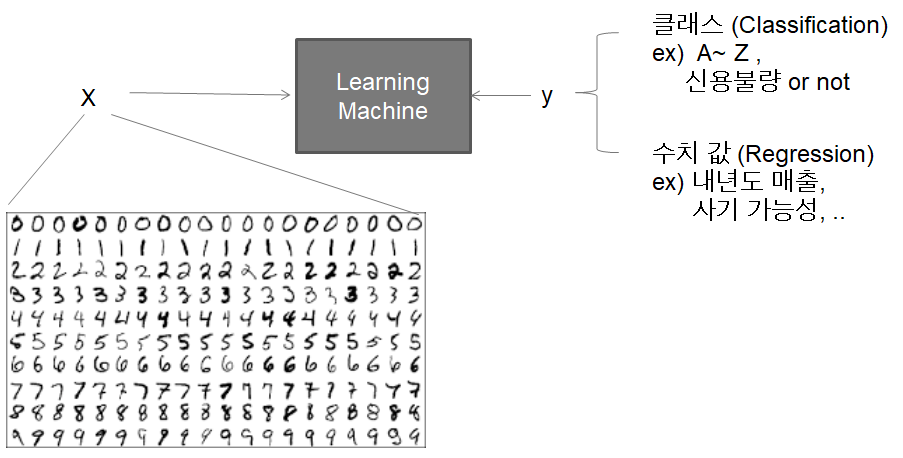
- 활용 (test)

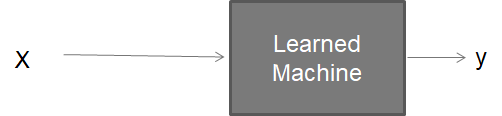

- machine learning 개발 과정

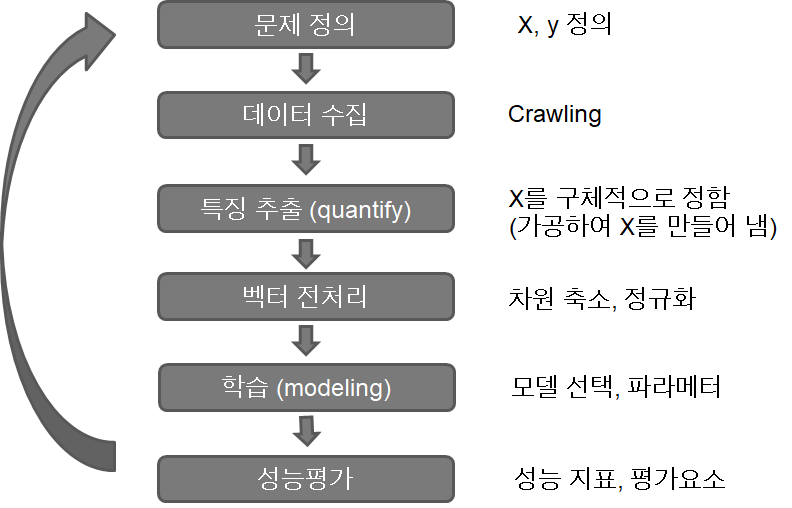


- 수치화 (quantify)

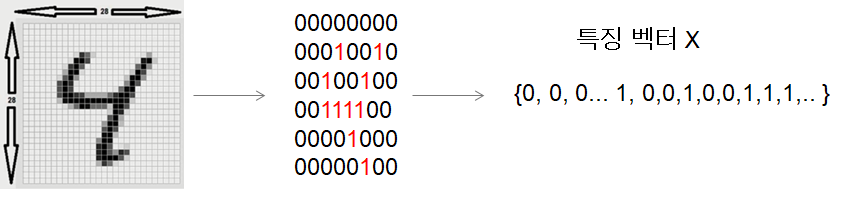

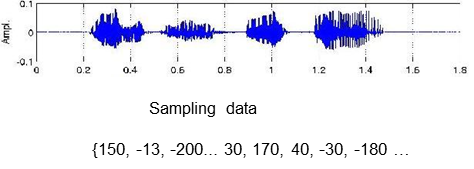

## regression (회귀 예측)

### 선형 회귀 모델 


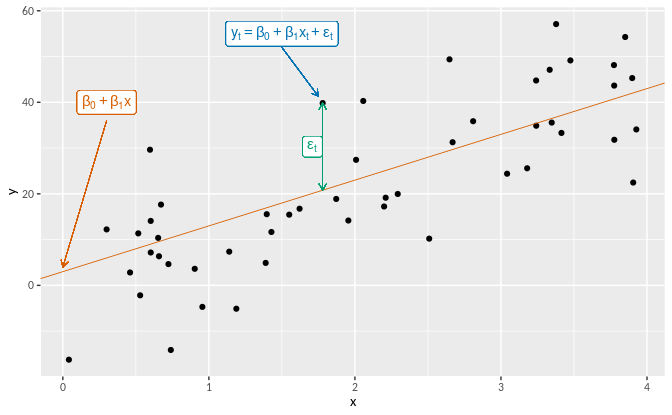

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [2]:
!pip install sklearn
#웬만한 모델과 알고리즘을 다 들어가 있는 모듈임

---

## 집값 예측

## 1) 데이터 수집

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## 2) 데이터 준비 및 탐색

- housing.DESCR : 데이터 설명
- housing.data : X 데이터
- housing.feature_names: X 데이터 feature names
- housing.target : y 데이터


In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.head()   # 상위 5개를 출력

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df['PRICE'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- dataframe.shape : 보편적 데이터 형태 조회

In [7]:
print(' 주택 가격 데이터 형태 : ', df.shape)

 주택 가격 데이터 형태 :  (20640, 9)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3) 모델 training

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# X, Y 분할하기
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False) #학습데이터만 남기기 위해 드롭함

print(X.shape, Y.shape)

(20640, 8) (20640,)


In [11]:
Y.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

- train_test_split (X, Y, test_size=비율, random_state= 결과재현을 위한 random seed고정)

In [12]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print( X_train.shape)
print( Y_train.shape)
print (Y_train) # row index, Y value 

(14448, 8)
(14448,)
10954    2.355
2538     0.600
5118     0.990
3269     1.406
13144    1.368
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: PRICE, Length: 14448, dtype: float64


In [13]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [14]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train) #fit이 학습임

LinearRegression()

In [15]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


array([2.81219561, 1.26208993, 1.43568493, ..., 1.82811758, 2.35080185,
       2.49388055])

## 4) 결과 분석 

### regression  모델 정보

In [16]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
print (df.head()) #컬럼 이름 찍은 것

Y 절편 값:  -35.703961079298544
회귀 계수 값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [17]:
coef = pd.Series(data =lr.coef_, index=X.columns)

print (coef)
#medinc 이 가장 큰 영향을 미침
#bedroom 도 많은 영향을 미침
#0에 가까운 것들은 미치는 영향이 적은 것

MedInc        0.442798
HouseAge      0.009073
AveRooms     -0.115072
AveBedrms     0.611526
Population   -0.000004
AveOccup     -0.003927
Latitude     -0.407213
Longitude    -0.420488
dtype: float64


### regression 성능 지표

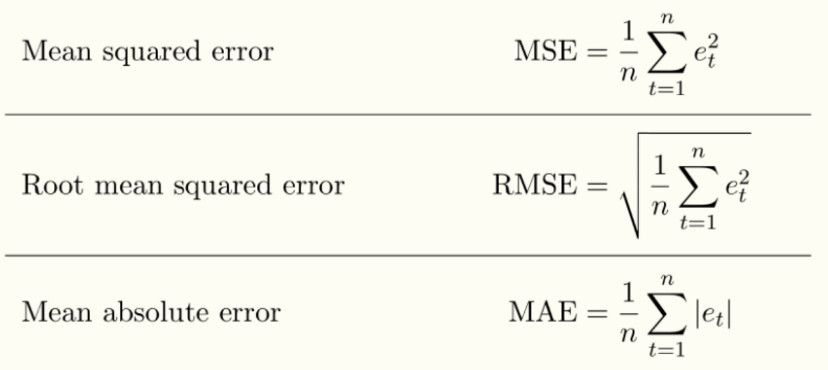

In [18]:
#위의 사진에서 e가 차이임 (정답과 예측값 사이)
#Mean squared error: 평균 제곱 오차, Root는 이 값에 근호
#Mean absolute error: 절댓값
print ( Y_predict)
print ( Y_test)

[2.81219561 1.26208993 1.43568493 ... 1.82811758 2.35080185 2.49388055]
10385    2.78700
1943     2.07600
7490     0.96700
16889    3.53800
11416    3.90500
          ...   
16911    5.00001
15066    1.12500
19410    1.74100
10126    2.27000
18568    1.94500
Name: PRICE, Length: 6192, dtype: float64


In [19]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

#5천만원짜리 집인데, 7천만원 정도가 제곱오차
#이 오류를 한 번 구했으니까, 위에서 전체 작업이 한 번 끝난 것임.

MSE : 0.539, RMSE : 0.734


### correlation
오류를 측정하는 또다른 방법

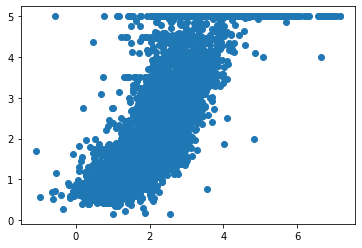

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_predict, Y_test)

In [21]:
import scipy.stats as stats
print ( stats.pearsonr( Y_test, Y_predict))

#상관계수가 0.77, 평균제곱오차가 0.734

PearsonRResult(statistic=0.7756332795047765, pvalue=0.0)


## coef 구하는 방법 :  경사하강법
오차가 난 것을 줄이는 방법

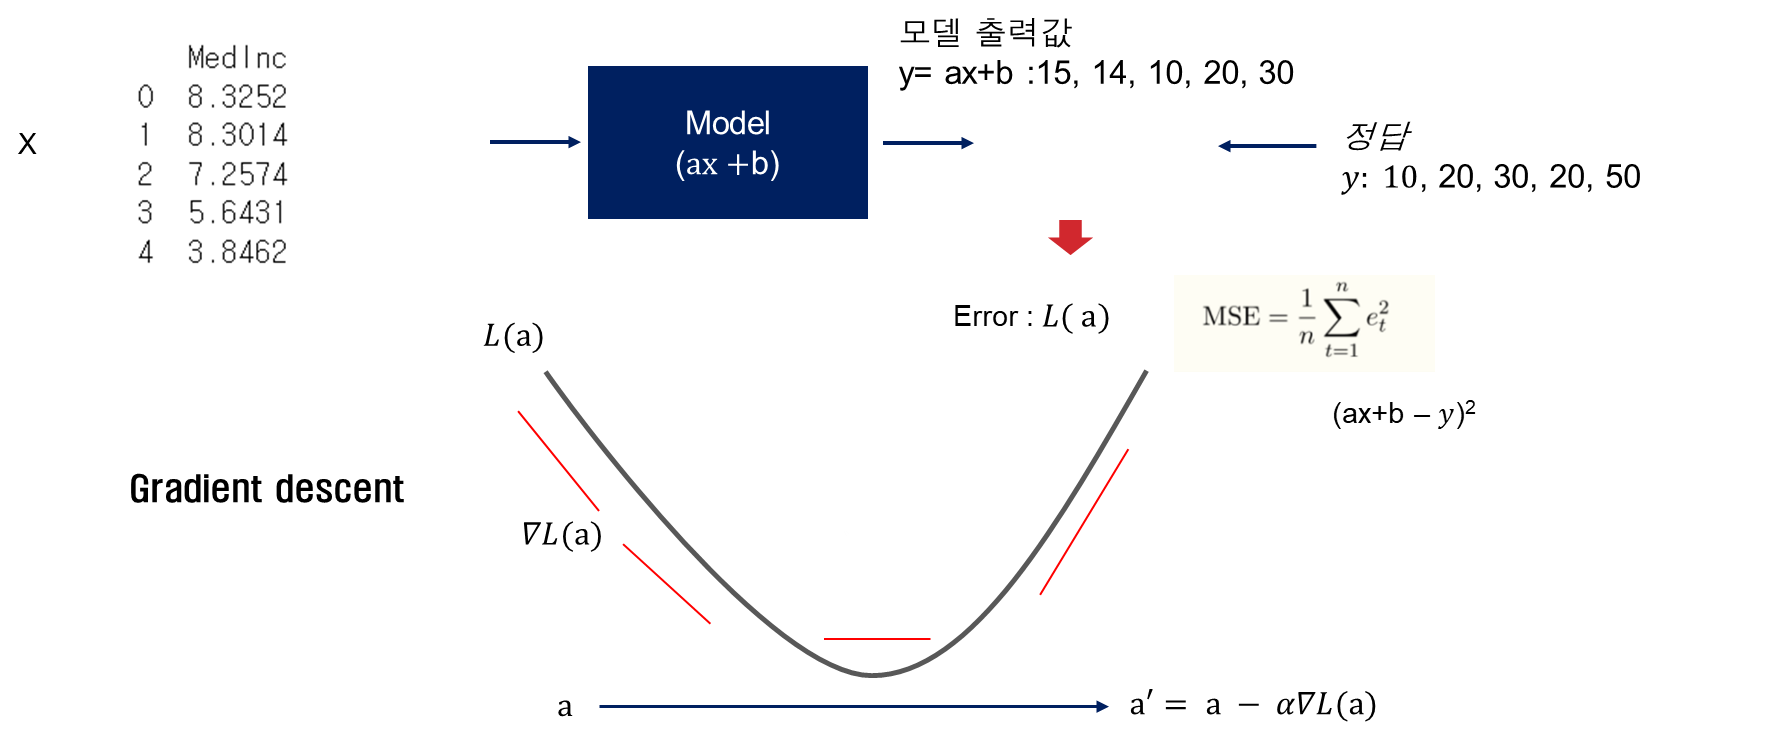

### 신경망, 딥러닝

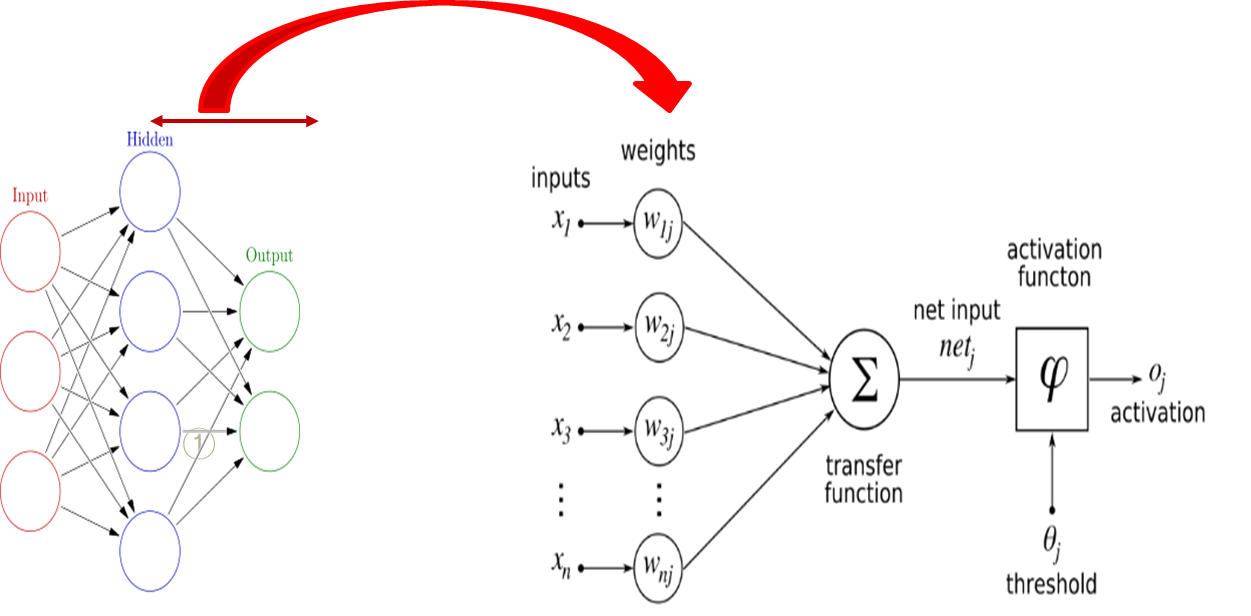

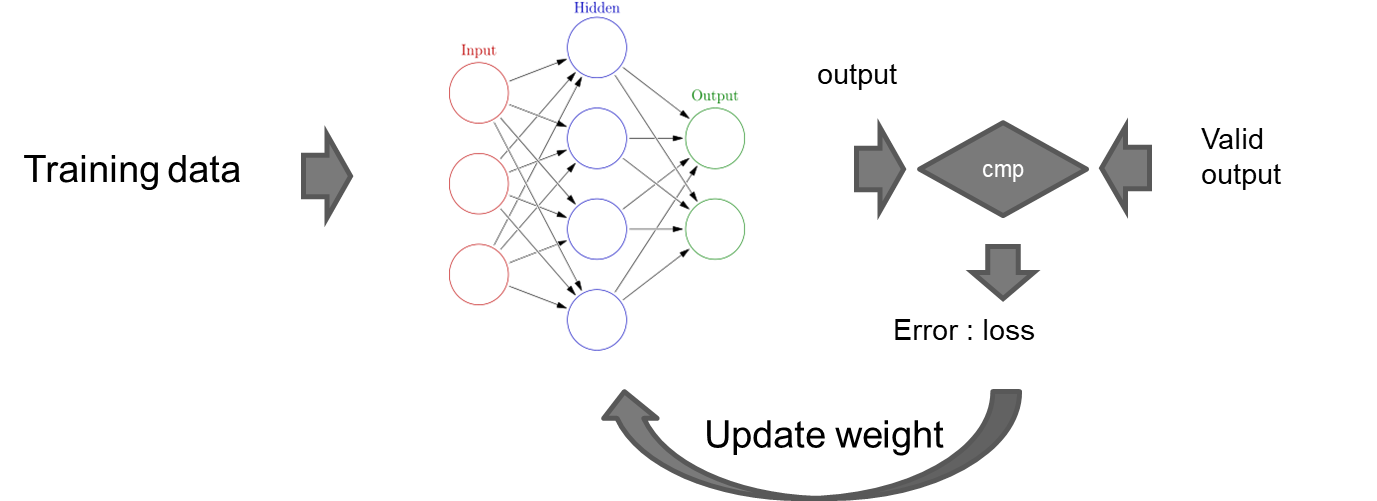

## 5)  시각화하기

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

- sns.regplot( x= X column, y= Y column, data= 데이터)

<AxesSubplot:xlabel='HouseAge', ylabel='PRICE'>

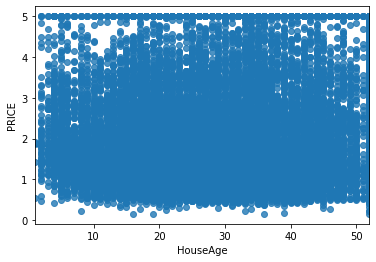

In [23]:
sns.regplot( x='HouseAge', y= 'PRICE', data= df)
#빽빽한 부분이 있으므로 기울기와 절편을 찾을 수 있었던 것

- fig, axs = plt.subplots( figsize=(x크기, y크기), ncols= x칸, nrows=y칸)
- sns.regplot (  ....,  ax=axs[row][col]) 

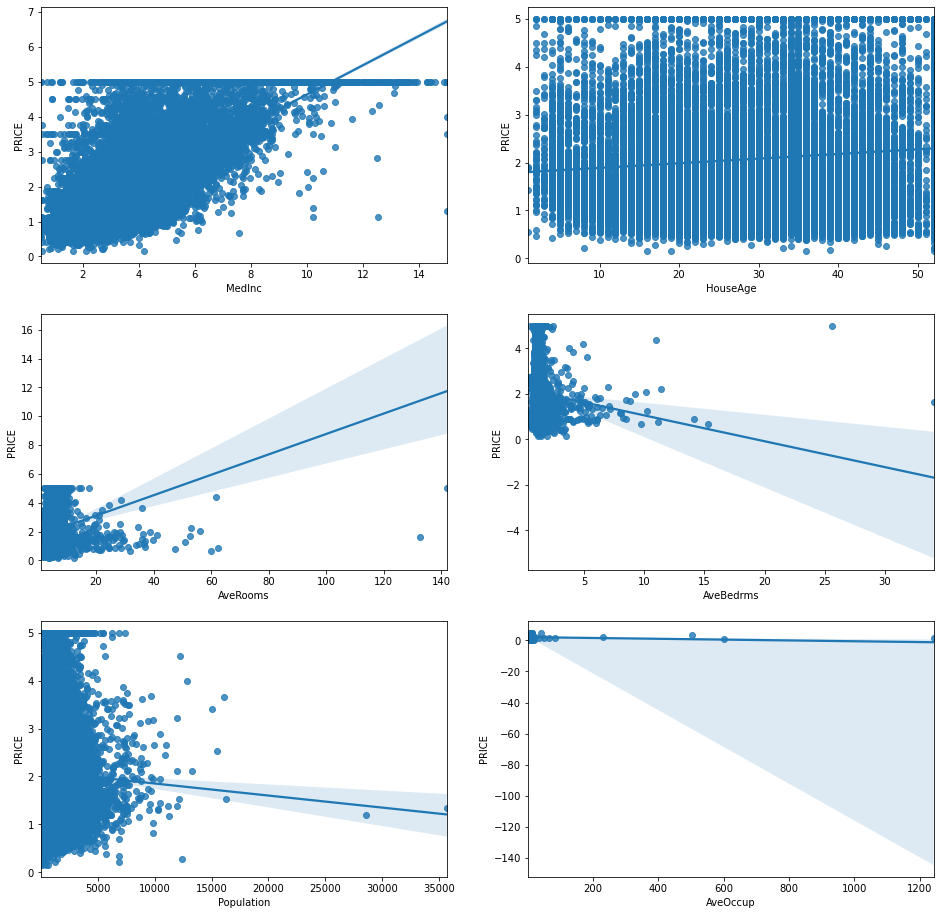

In [24]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2

      sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

## 과제1 : 전체 변수로 부터  MedIncome을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오 

In [25]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['PRICE'] = housing.target #가격 추가하기
print(df.head()) #price 열 추가되었는지 확인

Y=df['MedInc'] 
X=df.drop(['MedInc'], axis = 1, inplace = False)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)
lr = LinearRegression()
lr.fit(X_train, Y_train) 
Y_predict = lr.predict(X_test)
stats.pearsonr(Y_test, Y_predict)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


PearsonRResult(statistic=0.8365616320737386, pvalue=0.0)

--- 

## 자동차연비 예측

## 1) 데이터 수집

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [26]:
import numpy as np
import pandas as pd 


data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [27]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### - 분석하지 않을 변수 제외하기

- car_name : string
- origin : 명목변수 (크기가 의미가 없음)


In [29]:
#data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)


In [30]:
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


- 결측치 처리

In [31]:
# error 남
data_df.horsepower= data_df.horsepower.astype('int')

ValueError: invalid literal for int() with base 10: '?'

In [32]:
#data_df['horsepower']=='?'
data_df[data_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


- 결측치 처리 : horsepower , "?" 라는 값이 있어서 object로 처리됨
    - 결측치로 마킹 :  replace ('?', NaN)
    - record 전체를 날리거나, 대체값 넣어주기 : dropna, fillna

In [33]:
data_df.horsepower=data_df.horsepower.replace('?', np.NaN) #정석은 na로 채우는게 맞음
print ( data_df.shape)
data_df.info()

(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [34]:
data_df=data_df.dropna()
print ( data_df.shape)

(392, 7)


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [36]:
data_df.horsepower= data_df.horsepower.astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 23.0 KB


## 3) 모델 training

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [39]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [40]:
print ( X_train.shape)

(313, 6)


In [41]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [42]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [43]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [44]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 4))


Y 절편 값:  -16.37
회귀 계수 값:  [ 0.0521  0.0054  0.0073 -0.0074  0.1722  0.7483]


In [63]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
#coef.sort_values(ascending=False)
coef

cylinders       0.05
displacement    0.01
horsepower      0.01
weight         -0.01
acceleration    0.17
model_year      0.75
dtype: float64

In [64]:
print (Y_predict)

[23.11699122 27.80216223 31.17136662 21.48775234 34.27965452 30.05172326
 25.72009165 12.78228199 24.99207912 30.8718869  23.90216766 31.53121782
 20.13361512 30.99906612 30.70437769 15.48956906 31.32860371 31.42838151
  9.96882278 23.34456511 26.25946487 17.86854534 18.34726786 16.08901013
  9.94233483 19.4251906  30.61101098 18.92372789 22.3198151  30.45267835
 22.17007958 25.49545437 10.11956193 29.02766769 21.26624211 14.78825599
 17.37663092 21.6009888  34.29382613 24.19874481 15.46315561 11.13638146
 21.95721646 22.69193764 22.59575709 18.06776537  7.54276406 34.71199899
 21.60415669  9.64242823 15.60063845 23.98638526 28.29734819 31.63953576
 33.68492799 22.22181539 27.66884238 21.72876917 27.87873164 32.70509553
 28.06337347 26.44166471 34.18278641 22.5113597  23.03701911 21.25804318
 21.69588701 14.23107755 32.18949992  6.05195193 29.67769022 21.55395817
 18.48861027 31.40598061 23.39975981 32.44580644 19.51521378 11.1212454
 11.61215173]


In [65]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 12.860, RMSE : 3.586


In [66]:
print (X_test)

     cylinders  displacement  horsepower  weight  acceleration  model_year
82           4         120.0          97    2506          14.5          72
167          4          97.0          75    2171          16.0          75
356          4         108.0          75    2350          16.8          81
120          4         121.0         112    2868          15.5          73
385          4          91.0          67    1995          16.2          82
..         ...           ...         ...     ...           ...         ...
23           4         121.0         113    2234          12.5          70
295          4          98.0          80    1915          14.4          79
13           8         455.0         225    3086          10.0          70
91           8         400.0         150    4464          12.0          73
62           8         350.0         165    4274          12.0          72

[79 rows x 6 columns]


### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

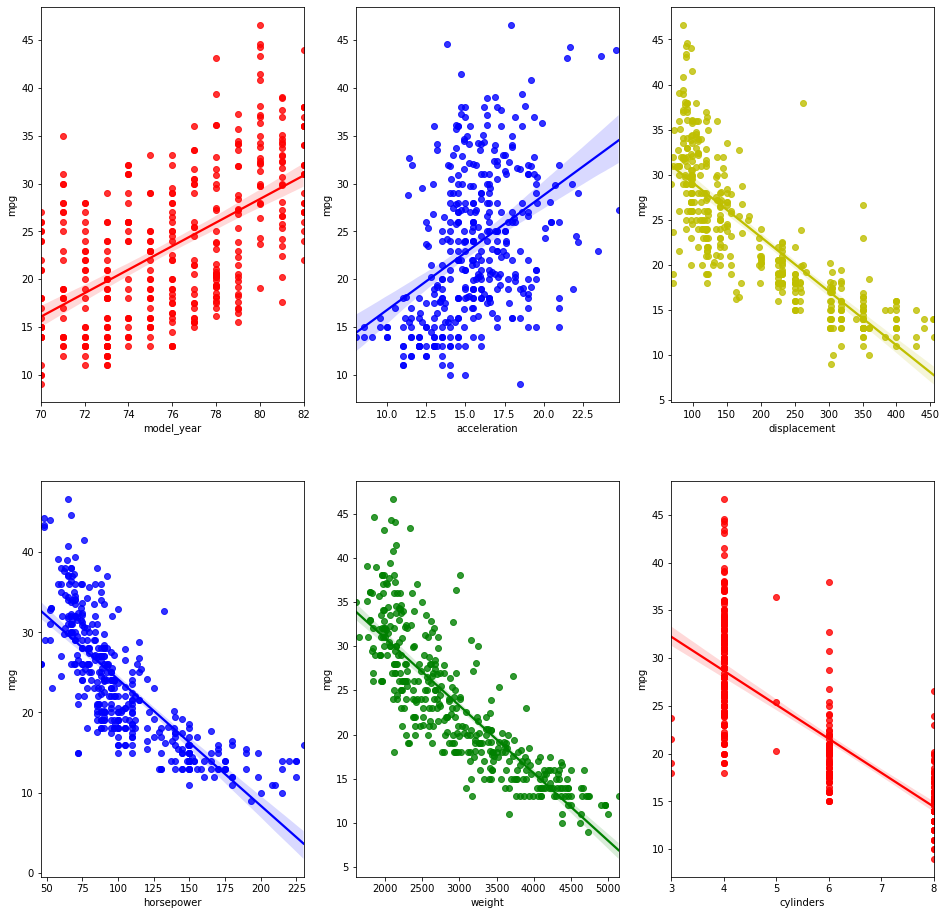

In [50]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

## 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df.horsepower=data_df.horsepower.replace('?', np.NaN) #정석은 na로 채우는게 맞음
data_df=data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')

data_df["h10"]= data_df["horsepower"]/10 #horsepower를 1/10으로 줄이기

y = data_df['mpg']
x = data_df.drop(['horsepower'], axis=1, inplace=False) #기존 horsepower를 drop
x = x.drop(['mpg'], axis = 1, inplace=False) #mpg 삭제

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
lr2 = LinearRegression()
lr2.fit(x_train,y_train)

coef2 = pd.Series(data=np.round(lr2.coef_, 4),index = x.columns)
print(coef2['h10'])

-0.0058


###   <<<< 연비 예측하기  >>>>

In [52]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders (%d ~ %d): "%(data_df['cylinders'].min(), data_df['cylinders'].max())))
displacement_1 = int(input("displacement (%d ~ %d): "%(data_df['displacement'].min(), data_df['displacement'].max())))
horsepower_1=int(input("horsepower (%d ~ %d): "%(data_df['horsepower'].min(), data_df['horsepower'].max())))
weight_1 = int(input("weight (%f ~ %f): "%(data_df['weight'].min(), data_df['weight'].max())))
acceleration_1 = int(input("acceleration (%f ~ %f): "%(data_df['acceleration'].min(), data_df['acceleration'].max())))
model_year_1 = int(input("model_year (%f ~ %f): "%(data_df['model_year'].min(), data_df['model_year'].max())))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders (3 ~ 8): 4
displacement (68 ~ 455): 400
horsepower (46 ~ 230): 50
weight (1613.000000 ~ 5140.000000): 4000
acceleration (8.000000 ~ 24.800000): 8
model_year (70.000000 ~ 82.000000): 79


In [53]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])

In [54]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 17.40 입니다.


## 5) 결과 개선 

- 다른 regression model
- parameter tuning 
- feature selection

### 모델 변경
- linear regression

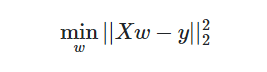
- ridge regression : 계수의 영향력을 줄이기 위함
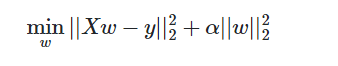

In [55]:
from sklearn import linear_model

models= [ LinearRegression(), linear_model.Ridge(alpha=.5) ]

for m in models:
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)
    
#mean square 기준 둘 차이가 미미함

12.859957660832833
12.859458843837063


### parameter tuning

In [56]:

for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (al/10, mse)

0.0 12.859957660832848
0.1 12.859857528862529
0.2 12.859757581767667
0.3 12.859657818956958
0.4 12.859558239841942
0.5 12.859458843837063
0.6 12.859359630359528
0.7 12.85926059882943
0.8 12.859161748669642
0.9 12.859063079305818


### feature selection

- 사용할 feature 선택
- K-best : feature 중 score가 높은 것 k 개 선택
- transform : k개 만 남기는 걸로 변환

cylinders: 451.044953
displacement: 576.367358
horsepower: 486.318544
weight: 682.203713
acceleration: 72.450006
model_year: 138.450494


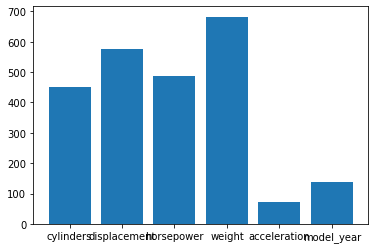

In [57]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest #쓸만한 feature를 뽑아줌
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,6) #6개에 맞춰서 나옴

for i in range(len(fs.scores_)):
    print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

#displacement가 가장 높은 점수, acceleration이 가장 낮은 점수이므로 
#가장 낮은 영향력을 미치는 feature

In [59]:
# 하나 씩 늘려가면서 score 보기

for k in range(1,7) :
    X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, k)

    m= LinearRegression()
    m.fit(X_train_fs, Y_train)
    Y_predict= m.predict(X_test_fs)
    mse = mean_squared_error(Y_test, Y_predict)
    print (k,  mse)
    
#제일 작은 점수가 있음 6개있는 것보다 5개 쓰는게 더 낫다

1 20.206361068118152
2 19.86806605630114
3 19.53509071076373
4 19.558188676345214
5 12.523159935714524
6 12.859957660832833


## 6) validation, test 

- 파라메터 선택 => 결과에 많은 영향을 줌
- test set을 이용한 파라메터 선택은 test set 에 fit 되었다고 볼 수도 있음
- 해결 방향 : 파라메터 선택을 위한 validation set과, 성능 평가를 위한 test set을 분리



In [60]:
# 6:2:2  split 3가지로 나뉘니까 6:2:2로
X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.4, random_state=1)

#tv를 다시 0.5로 나눈거니까 4를 반으로 == 2
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=1)

print (X_train.shape, X_validation.shape, X_test.shape)

(235, 6) (79, 6) (78, 6)


In [61]:
# 파라메터 선택  : alpha =0 
for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_validation)
    #print (Y_validation, Y_predict)
    mse = mean_squared_error(Y_validation, Y_predict)
    print (al/10, mse)

0.0 13.10194621788765
0.1 13.101888781644632
0.2 13.101831897965436
0.3 13.101775564049028
0.4 13.101719777113978
0.5 13.101664534398346
0.6 13.101609833159463
0.7 13.101555670673788
0.8 13.101502044236756
0.9 13.10144895116256


In [62]:
# test 
m= linear_model.Ridge(alpha=9/float(10)) 
m.fit(X_train, Y_train)
Y_predict= m.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print (mse)
#위의 validation보다 이 testset이 더 잘나옴

12.28356181265002


## 7) train, test data 에 따라 달라지는 결과 


In [63]:
for i in range(11, 20): #random seed
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    m= linear_model.Ridge(alpha=9/float(10)) #위의 validation에서 가장 잘 나온 값인 9를 alpha로 사용함
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)
    
#test sample을 어떻게 뽑냐에 따라서 결과가 다르게 나온다.
#원래는 이렇게 작게 안나왔는데, 테스트 샘플을 잘 뽑으니까 똑같은 seed 값을 줘도 이렇게 다른 결과가.!

13.614575026614126
16.748906837280263
12.69904574681605
11.833687035104456
14.951610665806623
13.721917953738467
12.253501042248073
11.801926702107108
11.084625958291015


## cross validation
하나씩 뽑아서 데이터를 test해보고 그 결과를 봄

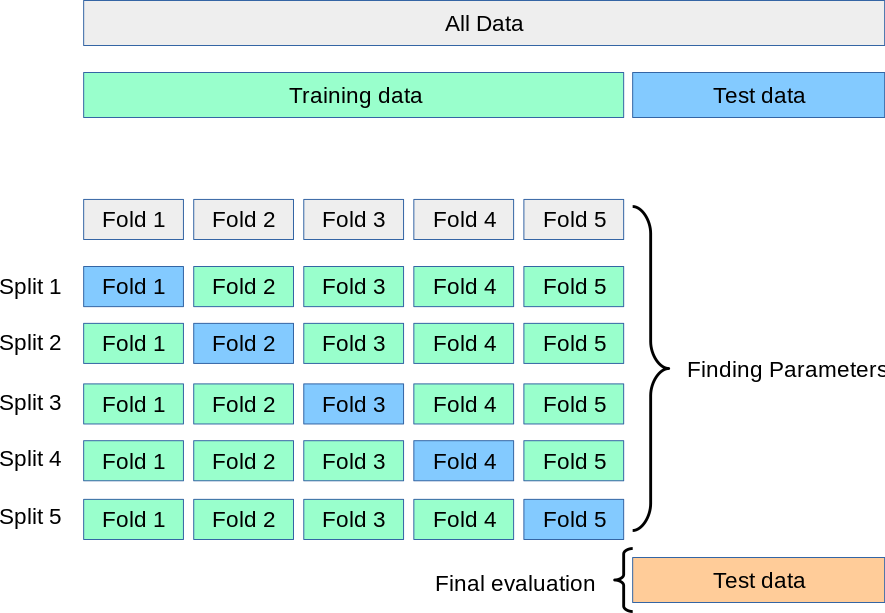

- KFold- 고정 분할

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

m= linear_model.Ridge(alpha=float(9)/10) 
scores= cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print ( scores['test_score'])


[15.60375576 11.40897318  6.30763871 15.28177556 30.76650039]


- KFold - random 추출

In [65]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
kfold=KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (scores)

[12.85906308 11.89695142 15.57385616 11.22008104  9.5606908 ]


## 과제3 : housing data 를  5-fold로 mse로 cross validation하여 score를 구하시오

In [66]:
housing = fetch_california_housing()
Y = housing.target
X = housing.data

m = LinearRegression()
kfold=KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (scores)

[0.52914023 0.5126393  0.53908745 0.50610094 0.55096393]
